In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [16]:
#file_path = "/home/jlab/g-2/daq/"
file_path = "/home/jlab/ExternalDrive/Seagate/Data/8-13/"
files_byRun = []
run_num = 18433
for file in os.listdir(file_path):
    if ((str(run_num) in file) and ('processed' not in file) and ('run_' not in file)):
        file = file_path+"processed_"+file
        files_byRun.append(file)
        
for x in files_byRun:
    print(x)

/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo02_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo03_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo05_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo06_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo07_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo08_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo09_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo11_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo12_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo13_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo14_18433.txt
/home/jlab/ExternalDrive/Seagate/Data/8-13/processed_f

In [17]:
start = 73
end = 75
print((files_byRun[0][start:end]))

02


In [18]:
caloVec = []
for i, file in enumerate(files_byRun):
    if i < 0.1:
        try:
            df = pandas.read_csv(file, header=None,delimiter=' ')
        except:
            print("ERROR: File not found --- ", file)
            continue
        df[9]=pandas.Series(int(file[start:end]), index=df.index)
        #print(df.head())
    else:
        try:
            dfi = pandas.read_csv(file, header=None,delimiter=' ')
        except:
            print("ERROR: File not found --- ", file)
            continue
        dfi[9]=pandas.Series(int(file[start:end]), index=df.index)
        #print(dfi.head())
        df = pandas.concat([df,dfi],ignore_index=True)
    caloVec.append(int(file[start:end]))

ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo05_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo06_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo07_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo14_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo19_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo20_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo21_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_calo22_18433.txt
ERROR: File not found ---  /home/jlab/ExternalDrive/Seagate/Data/8-13/processed_frontend_output_

In [19]:
print("Calorimeters in this set:" , caloVec)
df.describe()

Calorimeters in this set: [2, 3, 8, 9, 11, 12, 13, 15, 16, 17, 18]


,0,7,9
count,0.0,221408.000000,221408.000000
mean,NaN,9.904944,11.272727
std,NaN,2.253687,5.118444
min,NaN,9.577504,2.000000
25%,NaN,9.726144,8.000000
50%,NaN,9.768224,12.000000
75%,NaN,9.828384,16.000000
max,NaN,269.922363,18.000000


Mean for calo 2 :  9.994392134191177 +/- 2.4882787202321834
Mean for calo 3 :  9.746605019077831 +/- 0.03211287426939924
Mean for calo 8 :  9.650090157392658 +/- 0.032798731032115266
Mean for calo 9 :  10.054376654362125 +/- 4.285943440279056
Mean for calo 11 :  9.780130524642349 +/- 0.04595191910413249
Mean for calo 12 :  9.771779580286182 +/- 0.06611009797544609
Mean for calo 13 :  9.872074712937136 +/- 1.7086039432435445
Mean for calo 15 :  9.978618661168504 +/- 3.512849108763219
Mean for calo 16 :  9.880543423787824 +/- 3.9358878882555235
Mean for calo 17 :  10.497223230524659 +/- 0.0696533452304532
Mean for calo 18 :  9.728545871224236 +/- 0.04762843319081944


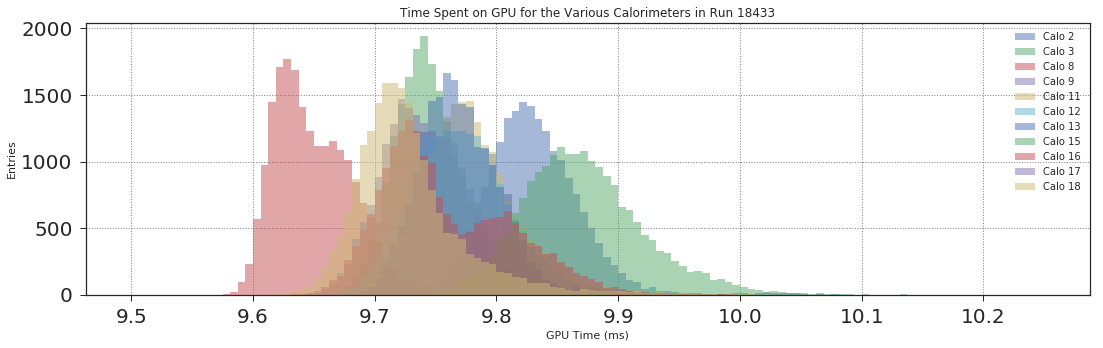

In [20]:
fig, ax = plt.subplots(figsize=(18, 5))
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    plt.hist(dfi[7],label="Calo "+str(calo),range=(9.5,10.25),bins=120,alpha=0.5)
    print("Mean for calo", calo,": ", np.mean(dfi[7]), "+/-", np.std(dfi[7]))
    
plt.xlabel("GPU Time (ms)")
plt.ylabel("Entries")
plt.title("Time Spent on GPU for the Various Calorimeters in Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.legend()
plt.show()

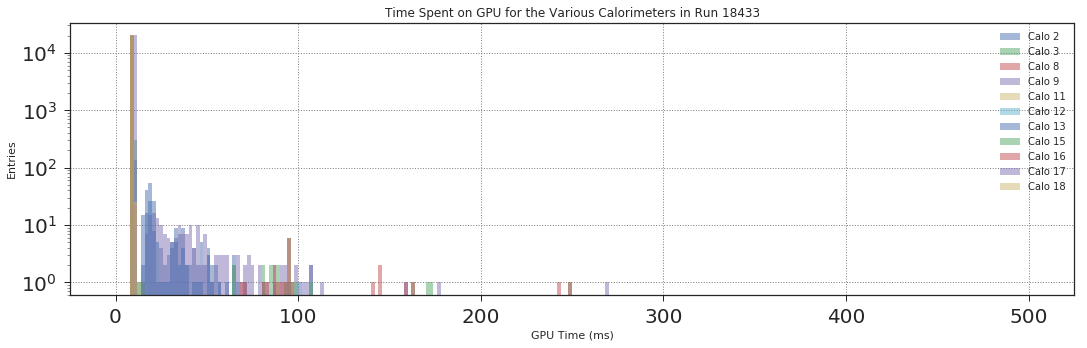

In [7]:
fig, ax = plt.subplots(figsize=(18, 5))
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    plt.hist(dfi[7],label="Calo "+str(calo),range=(0,500),bins=250,alpha=0.5)
    
plt.xlabel("GPU Time (ms)")
plt.ylabel("Entries")
plt.title("Time Spent on GPU for the Various Calorimeters in Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)
ax.set_yscale('log')

plt.legend()
plt.show()

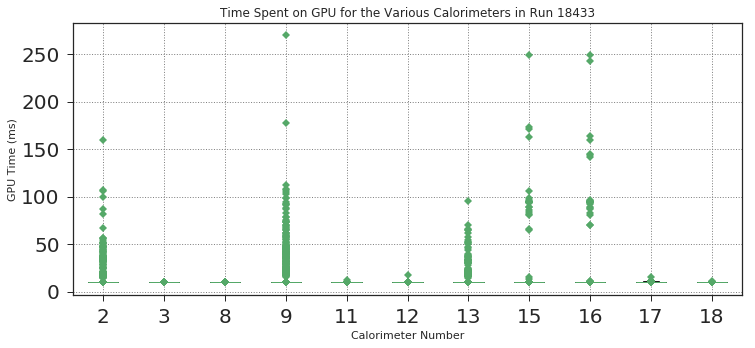

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
boxplotvec = []
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    boxplotvec.append(list(dfi[7]))
    
ding = plt.boxplot(boxplotvec,0, 'gD')
ax.set_xticklabels(caloVec)
    
    
plt.xlabel("Calorimeter Number")
plt.ylabel("GPU Time (ms)")
plt.title("Time Spent on GPU for the Various Calorimeters in Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

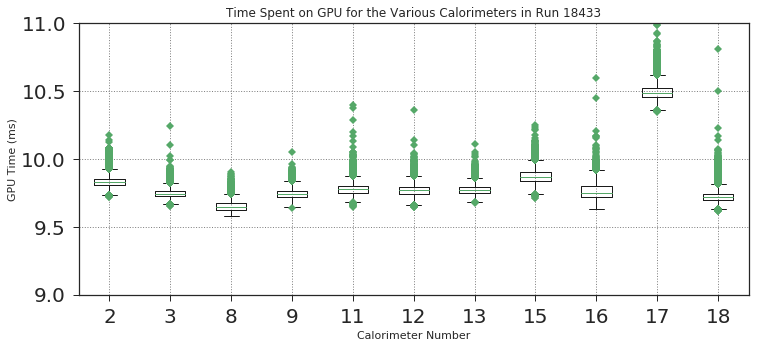

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
boxplotvec = []
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    boxplotvec.append(list(dfi[7]))
    
ding = plt.boxplot(boxplotvec,0, 'gD')
ax.set_xticklabels(caloVec)
    
    
plt.xlabel("Calorimeter Number")
plt.ylim(9,11)
plt.ylabel("GPU Time (ms)")
plt.title("Time Spent on GPU for the Various Calorimeters in Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

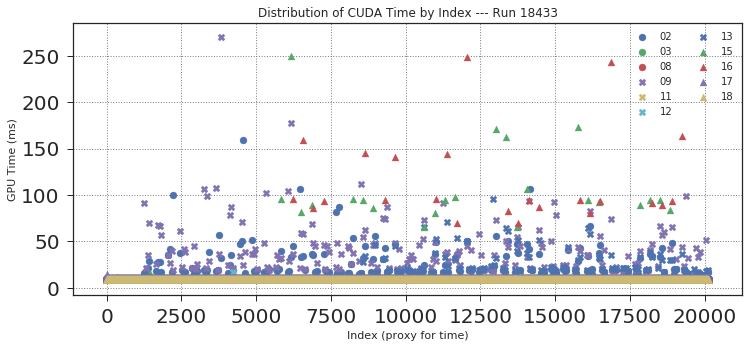

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
for i, file in enumerate(files_byRun):
    try:
        dfi = pandas.read_csv(file, header=None,delimiter=' ')
    except:
        continue
    dfi[9]=pandas.Series(int(file[start:end]), index=df.index)
    #print(dfi.head())
    
    if i > 10:
        markerstring = '^'
    elif i > 5:
        markerstring = 'X'
    else:
        markerstring = 'o'
        
    plt.scatter(dfi.index,dfi[7],label=str(file[start:end]),marker=markerstring)
        
plt.legend(ncol=2)
plt.xlabel("Index (proxy for time)")
plt.ylabel("GPU Time (ms)")
plt.title("Distribution of CUDA Time by Index --- Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

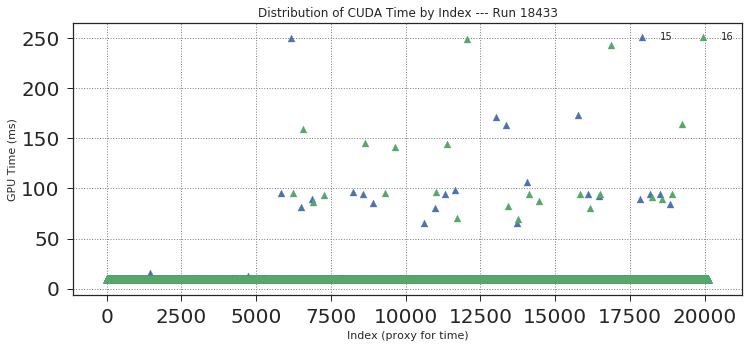

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
for i, file in enumerate(files_byRun):
    if(int(file[start:end]) == 15 or int(file[start:end]) == 16):
        try:
            dfi = pandas.read_csv(file, header=None,delimiter=' ')
        except:
            continue
        dfi[9]=pandas.Series(int(file[start:end]), index=df.index)
        #print(dfi.head())

        if i > 10:
            markerstring = '^'
        elif i > 5:
            markerstring = 'X'
        else:
            markerstring = 'o'

        plt.scatter(dfi.index,dfi[7],label=str(file[start:end]),marker=markerstring)
        
plt.legend(ncol=2)
plt.xlabel("Index (proxy for time)")
plt.ylabel("GPU Time (ms)")
plt.title("Distribution of CUDA Time by Index --- Run "+str(run_num))
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

In [12]:
dfoutliers = df.loc[df[7] > 50]
print(dfoutliers)
dfoutliers.describe()

         0    1     2       3      4        5     6           7   8   9
2231   NaN  :::  CUDA  kernel  total  elapsed  time  100.129089  ms   2
3773   NaN  :::  CUDA  kernel  total  elapsed  time   56.453087  ms   2
4515   NaN  :::  CUDA  kernel  total  elapsed  time   50.947521  ms   2
4573   NaN  :::  CUDA  kernel  total  elapsed  time  159.275391  ms   2
4857   NaN  :::  CUDA  kernel  total  elapsed  time   51.060257  ms   2
6457   NaN  :::  CUDA  kernel  total  elapsed  time  106.133858  ms   2
7657   NaN  :::  CUDA  kernel  total  elapsed  time   81.913635  ms   2
7773   NaN  :::  CUDA  kernel  total  elapsed  time   87.406654  ms   2
8231   NaN  :::  CUDA  kernel  total  elapsed  time   53.443008  ms   2
8973   NaN  :::  CUDA  kernel  total  elapsed  time   55.954880  ms   2
12057  NaN  :::  CUDA  kernel  total  elapsed  time   51.035458  ms   2
13031  NaN  :::  CUDA  kernel  total  elapsed  time   55.685631  ms   2
13431  NaN  :::  CUDA  kernel  total  elapsed  time   50.647678 

,0,7,9
count,0.0,119.000000,119.000000
mean,NaN,89.722109,10.983193
std,NaN,42.059019,4.489127
min,NaN,50.484768,2.000000
25%,NaN,61.896368,9.000000
50%,NaN,82.843452,9.000000
75%,NaN,95.233216,15.000000
max,NaN,269.922363,16.000000
